In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 46)


In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

### Pie Charts

In [7]:
# use a pie chart to explore the proportion (percentage) of new immigrants 
# grouped by continents for the entire time period from 1980 to 2013

In [8]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,38543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,618948.0
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,155075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3317794.0
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,28691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1410947.0
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,765148.0
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241142.0


<AxesSubplot:ylabel='Total'>

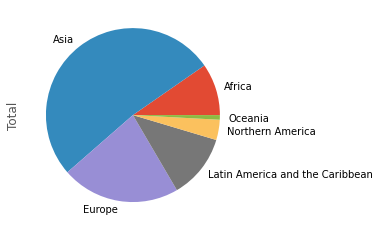

In [9]:
df_continents['Total'].plot(kind='pie')

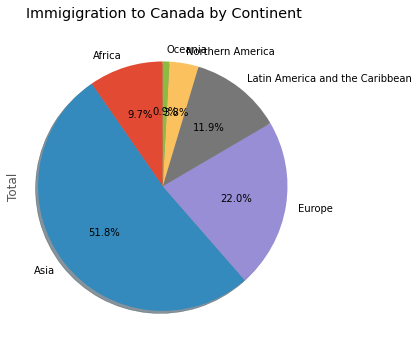

In [39]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow    
                            #pctdistance=1.0, 
                            #labeldistance=1.2,
                            )

plt.title('Immigigration to Canada by Continent')
plt.axis('equal')
plt.show()

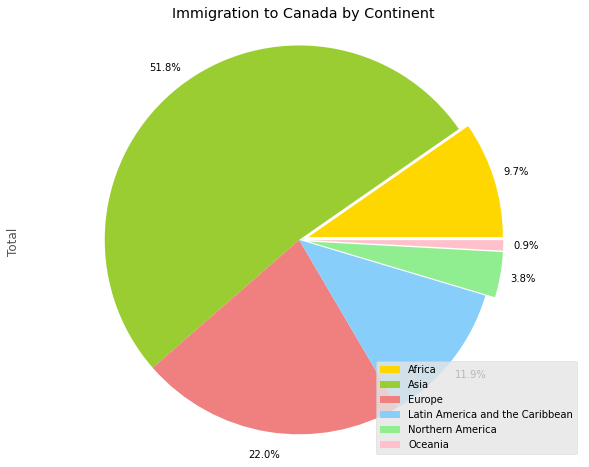

In [58]:
# We can see labels overlaping, the chart is not clear, lets make modifications
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.05, 0, 0, 0, 0.05, 0.05] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                           figsize=(10,8),
                           autopct='%1.1f%%',
                            startangle=1800,
                            #shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list                            
                           )

plt.title('Immigration to Canada by Continent')
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='lower right')
plt.show()


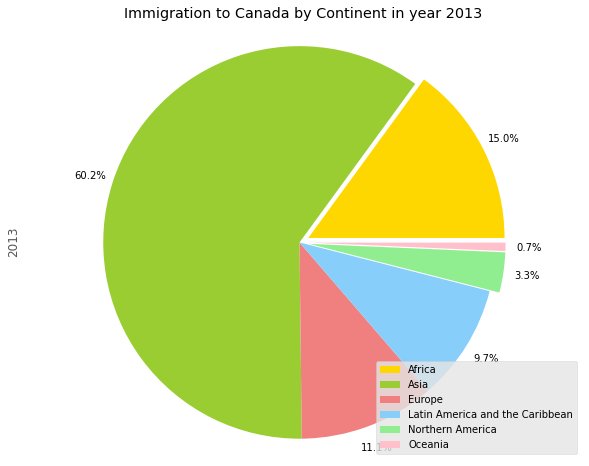

In [59]:
## Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.05, 0, 0, 0, 0.05, 0.05] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                           figsize=(10,8),
                           autopct='%1.1f%%',
                            startangle=1800,
                            #shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list                            
                           )

plt.title('Immigration to Canada by Continent in year 2013')
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='lower right')
plt.show()

### Box Plots
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

Minimum: The smallest number in the dataset excluding the outliers.
First quartile: Middle number between the minimum and the median.
Second quartile (Median): Middle number of the (sorted) dataset.
Third quartile: Middle number between median and maximum.
Maximum: The largest number in the dataset excluding the outliers

In [60]:
# Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

dfjap = df_can.loc[['Japan'],years].transpose()
dfjap.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


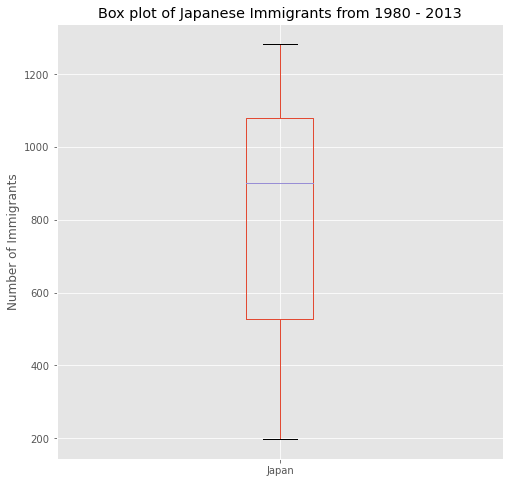

In [63]:
dfjap.plot(kind='box',figsize=(8,8))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [64]:
dfjap.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


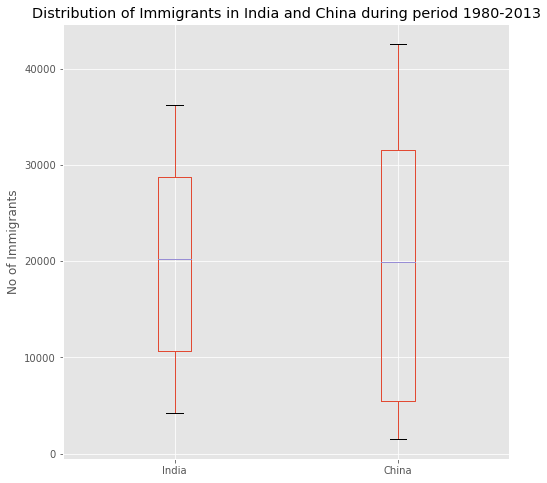

In [66]:
#Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013

dff = df_can.loc[['India','China'],years].transpose()
dff.plot(kind='box',figsize=(8,8))

plt.title('Distribution of Immigrants in India and China during period 1980-2013')
plt.ylabel('No of Immigrants')

plt.show()

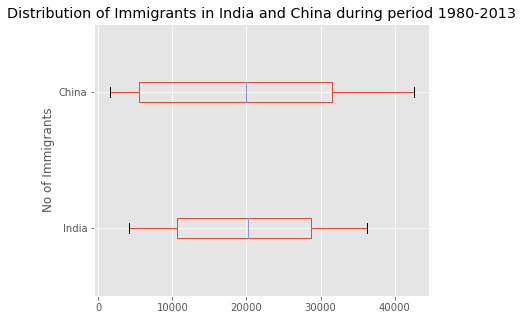

In [69]:
# to view it horizontally

dff.plot(kind='box',figsize=(6,5), vert=False)

plt.title('Distribution of Immigrants in India and China during period 1980-2013')
plt.ylabel('No of Immigrants')

plt.show()

In [70]:
dff.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


### Subplots
To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer

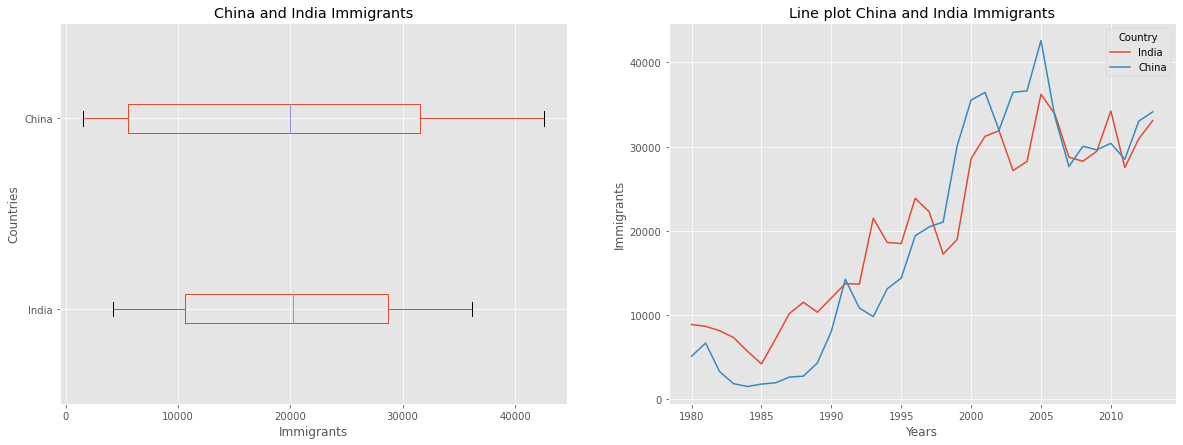

In [77]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

dff.plot(kind='box',vert=False,ax=ax0,figsize=(20,7))
ax0.set_title('China and India Immigrants')
ax0.set_xlabel('Immigrants')
ax0.set_ylabel('Countries')

dff.plot(kind='line', ax=ax1,figsize=(20,7))
ax1.set_title('Line plot China and India Immigrants')
ax1.set_xlabel('Years')
ax1.set_ylabel('Immigrants')

plt.show()

In [80]:
# Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s

top15 = df_can.nlargest(15,'Total')
top15.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,33087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691904.0
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,34129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,5827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551500.0


In [81]:
# Create a list of all years in decades 80's, 90's, and 00's.
# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
# Merge the three series into a new data frame. Call your dataframe new_df.

yrs80s = list(map(str,range(1980,1990)))
yrs90s = list(map(str,range(1990,2000)))
yrs00s = list(map(str,range(2000,2010)))

df80s = top15.loc[:,yrs80s].sum(axis=1)
df90s = top15.loc[:,yrs90s].sum(axis=1)
df00s = top15.loc[:,yrs00s].sum(axis=1)

finaldf= pd.DataFrame({'1980s':df80s,'1990s':df90s,'2000s':df00s})

finaldf.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


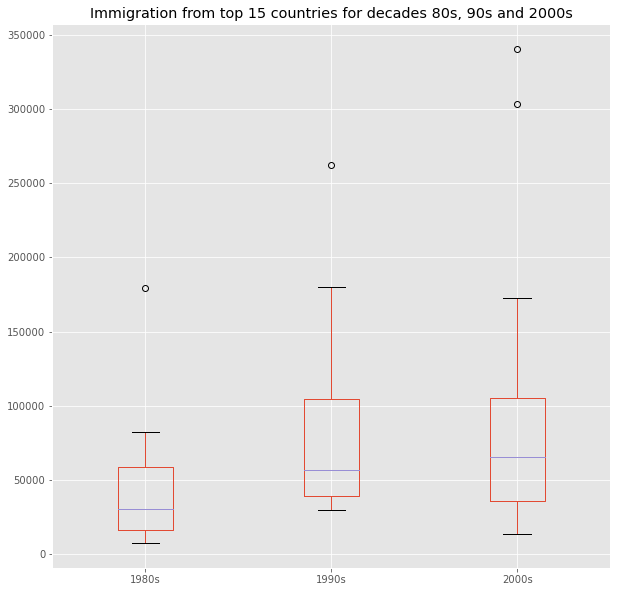

In [84]:
finaldf.plot(kind='box', figsize=(10,10))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

### Scatter Plots

In [97]:
#Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013

#df_can.head()
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int,df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['Year','Total']

df_tot.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


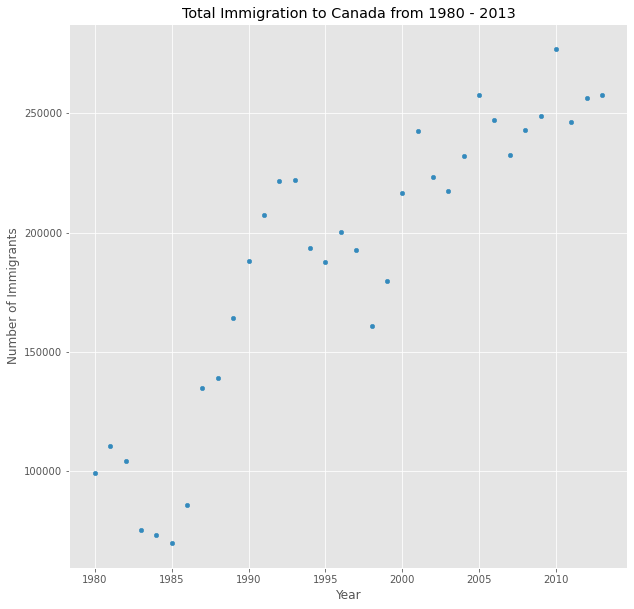

In [101]:
df_tot.plot(kind='scatter',x='Year',y='Total',figsize=(10,10))

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


In [103]:
#So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015

x= df_tot['Year']
y = df_tot['Total']
fit = np.polyfit(x,y,deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

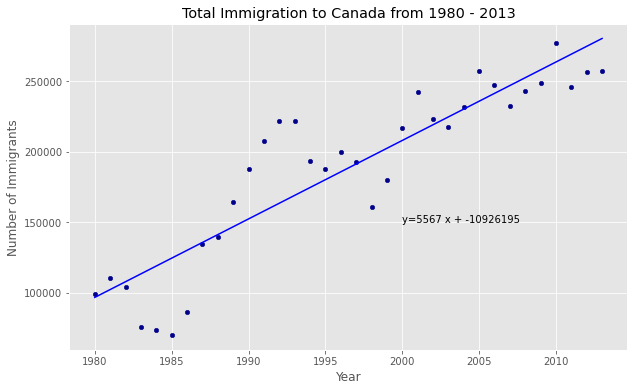

'Number of Immigrants = 5567 * Year + -10926195'

In [107]:
# Plot the regression line on the scatter plot.

df_tot.plot(kind='scatter', x='Year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x,fit[0]*x+fit[1], color = 'blue')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Number of Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [116]:
#Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

#Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only
dff1 = df_can.loc[['Denmark','Norway','Sweden'],years]
dff1.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [120]:
#Sum the immigration numbers across all three countries for each year and turn the result into a dataframe
dff2 = pd.DataFrame(dff1.sum(axis=0))

#Reset the index in place
dff2.reset_index(inplace=True)

#rename the columns
dff2.columns=['Year','Total']

dff2.head(3)


,Year,Total
0,1980,669
1,1981,678
2,1982,627


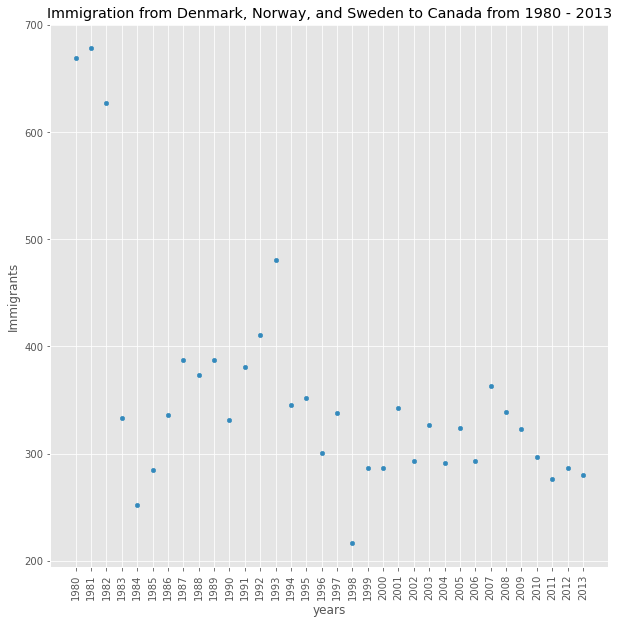

In [122]:
dff2.plot(kind='scatter', figsize=(10,10), x='Year', y='Total',rot=90)

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('years')
plt.ylabel('Immigrants')

plt.show()

### Bubble Plots 
A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. In maplotlib, we can pass in an array or scalar to the parameter s to plot(), that contains the weight of each point.

In [123]:
# Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013

# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [124]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

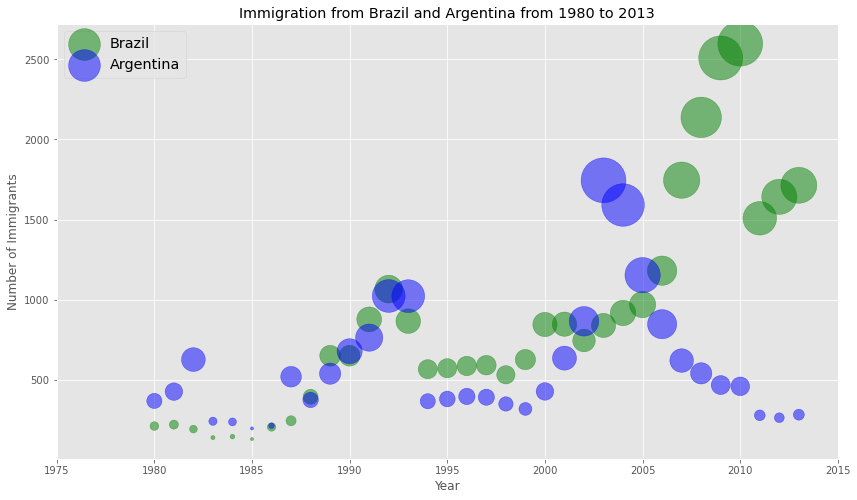

In [125]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

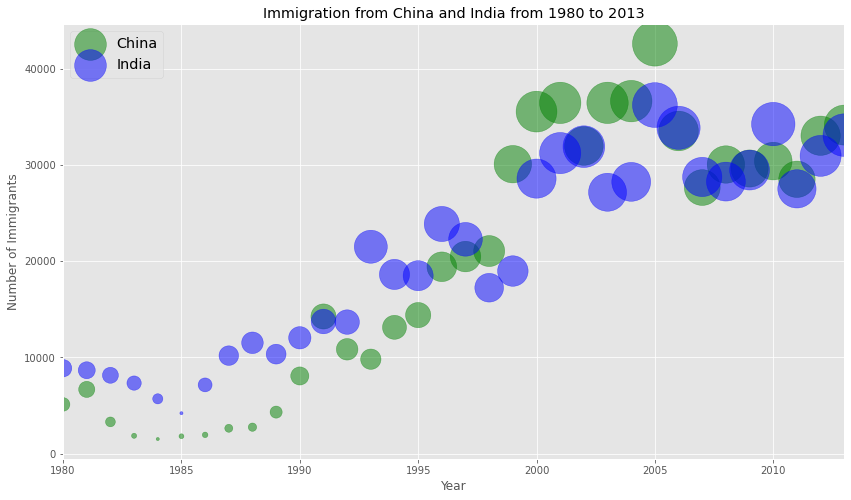

In [126]:
# Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013

# normalize Brazil data
norm_China = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize Argentina data
norm_India = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_China * 2000 + 10,  # pass in weights 
                    xlim=(1980, 2013)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_India * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

